In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
files = os.listdir() 

In [5]:
files[1]

'AAA_PDD_DoseProfile.txt'

In [6]:
files[2]

'AXB_PDD_DoseProfile.txt'

In [11]:
AAA_df = pd.read_table(files[1], skiprows=11, index_col=0, header=None, names=['PDD'])
AAA_df = 100.0*AAA_df/AAA_df.max()   # normalise

AXB_df = pd.read_table(files[2], skiprows=11, index_col=0, header=None, names=['PDD'])
AXB_df = 100.0*AXB_df/AXB_df.max()   # normalise

In [12]:
files[5]

'LA6_6MV_10x10_PDD.csv'

In [15]:
measured_df = pd.read_csv(files[5], index_col=0)    # the 6MV LA6 2015 data
measured_df = 100.0*measured_df/measured_df.max()   # normalise
measured_df.index = measured_df.index.values/10.0   # make cm
# measured_df.plot()

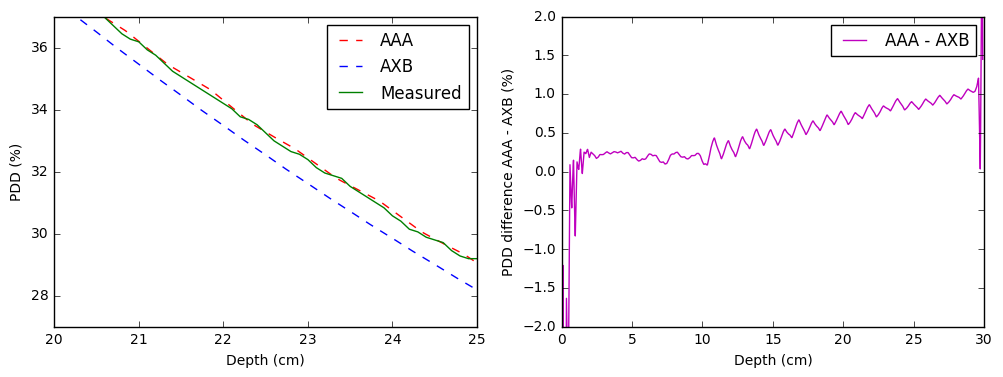

In [30]:
height=4
width=12           # wwidth of figs
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(width, height))

ax1.plot(AAA_df, label = 'AAA', linestyle='--', c='r')
ax1.plot(AXB_df, label = 'AXB', linestyle='--', c='b')
ax1.plot(measured_df, label = 'Measured',  c='g')
ax1.legend()
ax1.set_xlabel('Depth (cm)')
ax1.set_ylabel('PDD (%)')
ax1.set_xlim([20,25])
ax1.set_ylim([27,37])

ax2.plot(AAA_df-AXB_df, label = 'AAA - AXB', c='m')
ax2.set_ylim([-2,2])
ax2.set_xlabel('Depth (cm)')
ax2.set_ylabel('PDD difference AAA - AXB (%)')
ax2.legend()

plt.show()